In [1]:
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy import interpolate
import japanize_matplotlib

import numpy as np

In [2]:
def integrate_normal_distribution(a, b, mu=0, sigma=1):
    """
        Integrate the normal distribution from a to b.

        Parameters:
        a (float): The lower limit of integration.
        b (float): The upper limit of integration.
        mu (float): The mean of the normal distribution. Default is 0.
        sigma (float): The standard deviation of the normal distribution. Default is 1.

        Returns:
        float: The result of the integration.
        """
    # Define the probability density function of the normal distribution.
    def pdf(x): return norm.pdf(x, mu, sigma)

    # Integrate the pdf from a to b.
    result, _ = quad(pdf, a, b)

    return result


def real_demand_function(fare):
    """
    Calculate the demand based on the fare and need.

    Parameters:
    fare (float): The fare.

    Returns:
    float: The demand.
    """

    # make fare=0.05 at mu(=0) in the nomal distribution
    # a mapping between fare(0~0.3) and f(-1000~1000)
    if fare < 0.05:
        f = 20000*fare - 1000
    else:
        f = 4000*fare-200
    idx = integrate_normal_distribution(f, float('inf'), 0, 200)

    return idx


def get_interpolated_demand_fuction():

    demand = []
    fare_range = np.arange(0, 0.3001, 0.012)
    for f in fare_range:
        demand.append(real_demand_function(f))
    return interpolate.interp1d(fare_range, demand, kind='quadratic')

Text(0.5, 1.0, '需要関数')

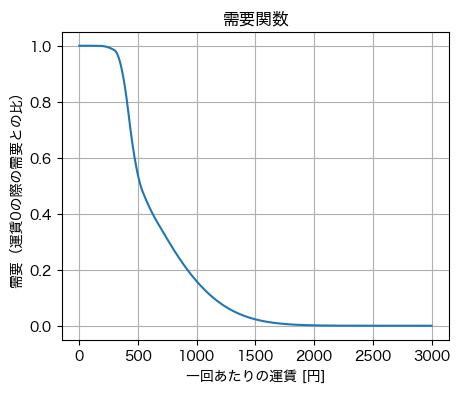

In [21]:
demand_function = get_interpolated_demand_fuction()
d = []
ff = np.linspace(0,0.3,1000)
for f in ff:
    d.append(demand_function(f))
plt.figure(figsize=(5,4))
plt.plot(ff*10000,d)
plt.grid()
plt.xlabel('一回あたりの運賃 [円]')
plt.ylabel('需要（運賃0の際の需要との比）')
plt.title('需要関数')

In [32]:
np.arange(0,0.3001,0.012)

array([0.   , 0.012, 0.024, 0.036, 0.048, 0.06 , 0.072, 0.084, 0.096,
       0.108, 0.12 , 0.132, 0.144, 0.156, 0.168, 0.18 , 0.192, 0.204,
       0.216, 0.228, 0.24 , 0.252, 0.264, 0.276, 0.288, 0.3  ])